In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Amazon Sale Report.csv")

In [3]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
data.dtypes

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
New                   float64
PendingS              float64
dtype: object

In [5]:
data.isna().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [6]:
print(data.isnull().sum())

# Handling missing values
data.dropna(subset=['Order ID', 'Date', 'Status', 'Fulfilment', 'Category', 'Qty', 'Amount'], inplace=True)

# Converting date to Datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extracting year,month,day
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day


index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64


C:\Users\Sahil Gawande\AppData\Local\Temp\ipykernel_13816\1039381181.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [7]:
data['Date']

0        2022-04-30
1        2022-04-30
2        2022-04-30
3        2022-04-30
4        2022-04-30
            ...    
128971   2022-05-31
128972   2022-05-31
128973   2022-05-31
128974   2022-05-31
128975   2022-05-31
Name: Date, Length: 121176, dtype: datetime64[ns]

In [8]:
data.isna().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                   0
Amount                     0
ship-city                 33
ship-state                33
ship-postal-code          33
ship-country              33
B2B                        0
fulfilled-by           83649
New                   121176
PendingS              121176
Year                       0
Month                      0
Day                        0
dtype: int64

In [9]:
# Total sales
total_sales = data['Amount'].sum()

# Average order value
average_order_value = data['Amount'].mean()

# Total number of orders
total_orders = data['Order ID'].nunique()

# Sales growth rate 
monthly_sales = data.groupby(['Year', 'Month'])['Amount'].sum()
sales_growth_rate = (monthly_sales.iloc[-1] - monthly_sales.iloc[0]) / monthly_sales.iloc[0] * 100

print(f"Total Sales: {total_sales}")
print(f"Average Order Value: {average_order_value}")
print(f"Total Orders: {total_orders}")
print(f"Sales Growth Rate: {sales_growth_rate:.2f}%")


Total Sales: 78590170.24999999
Average Order Value: 648.562176090975
Total Orders: 112887
Sales Growth Rate: 22937.89%


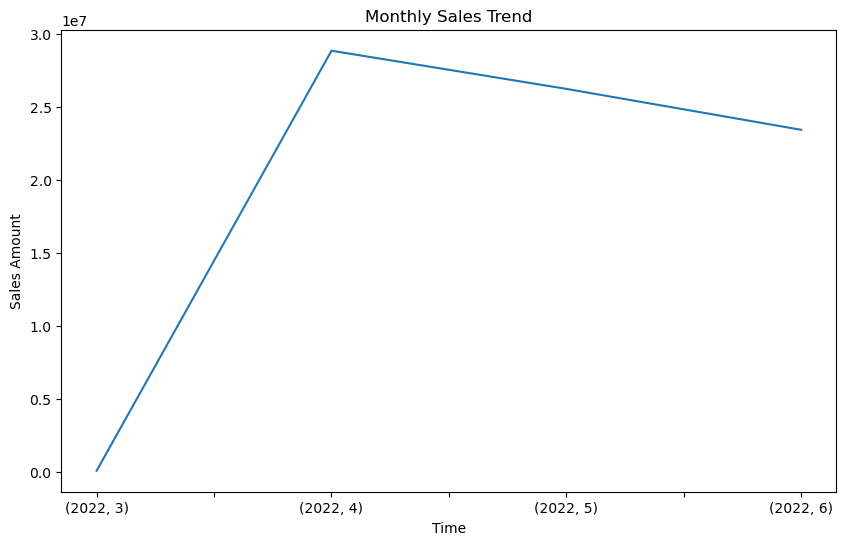

In [11]:
import matplotlib.pyplot as plt

# Monthly sales trend
plt.figure(figsize=(10, 6))

monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel('Time')
plt.ylabel('Sales Amount')
plt.show()


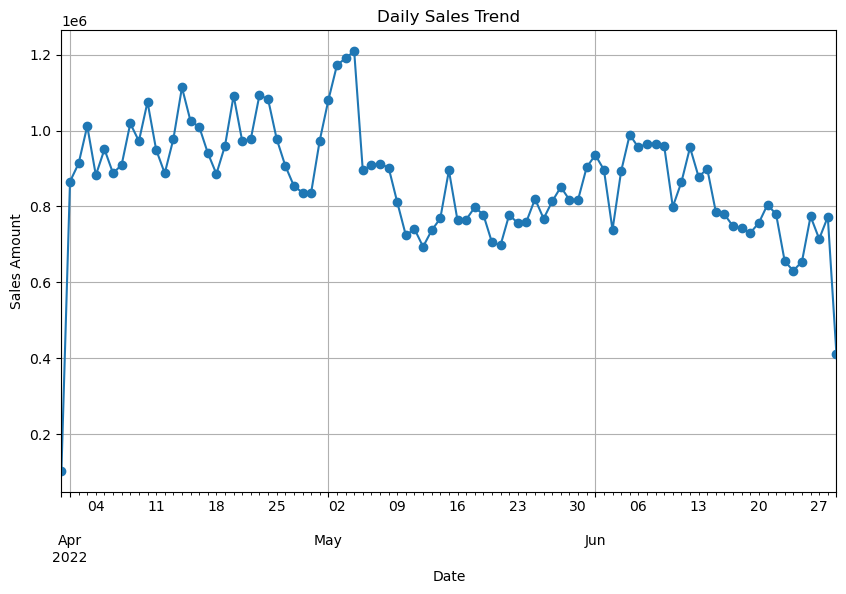

In [14]:
# Daily sales time series
daily_sales = data.groupby('Date')['Amount'].sum()
monthly_sales = data.resample('M', on='Date')['Amount'].sum()
plt.figure(figsize=(10, 6))
daily_sales.plot(marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Daily Sales Trend')
plt.grid(True)
plt.show()

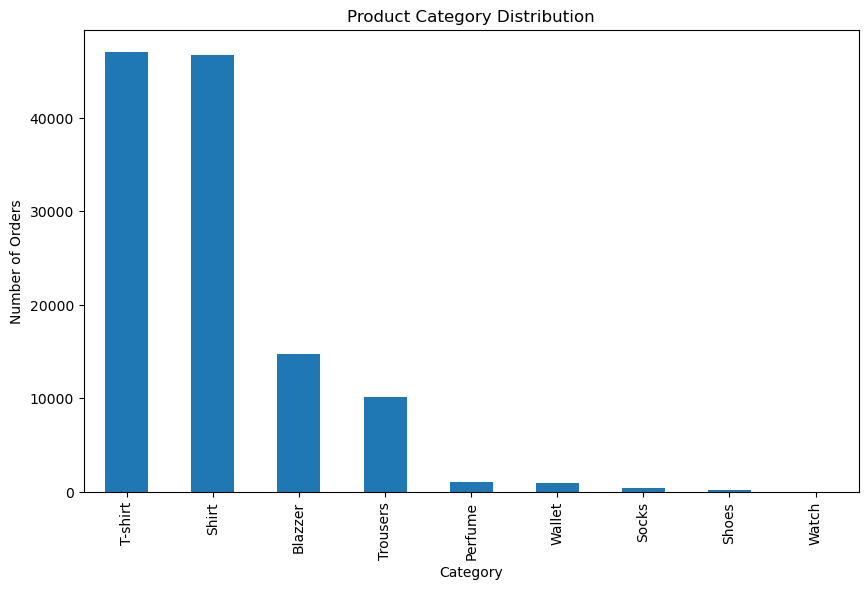

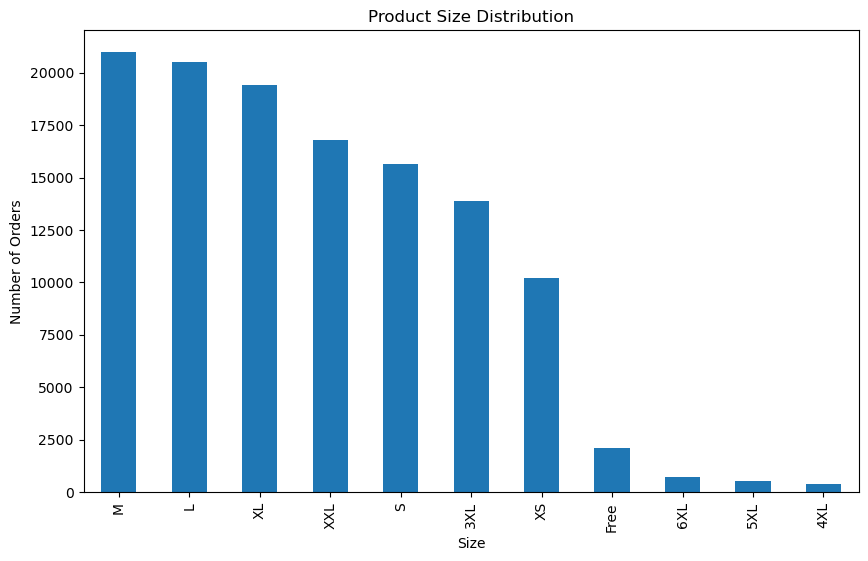

In [12]:
# Product category distribution
category_distribution = data['Category'].value_counts()

# Visualize category distribution
plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar', title='Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.show()

# Size analysis
plt.figure(figsize=(10, 6))
size_distribution = data['Size'].value_counts()
size_distribution.plot(kind='bar', title='Product Size Distribution')
plt.xlabel('Size')
plt.ylabel('Number of Orders')
plt.show()


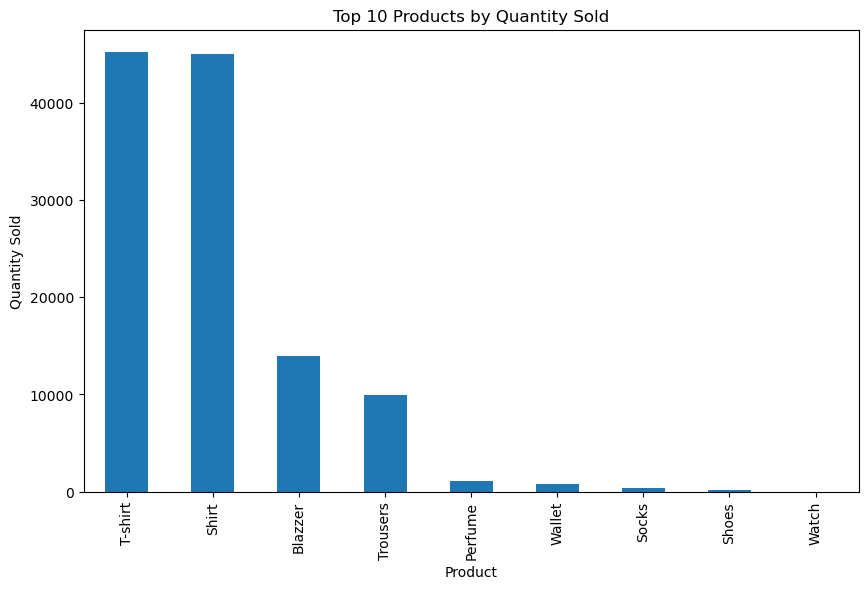

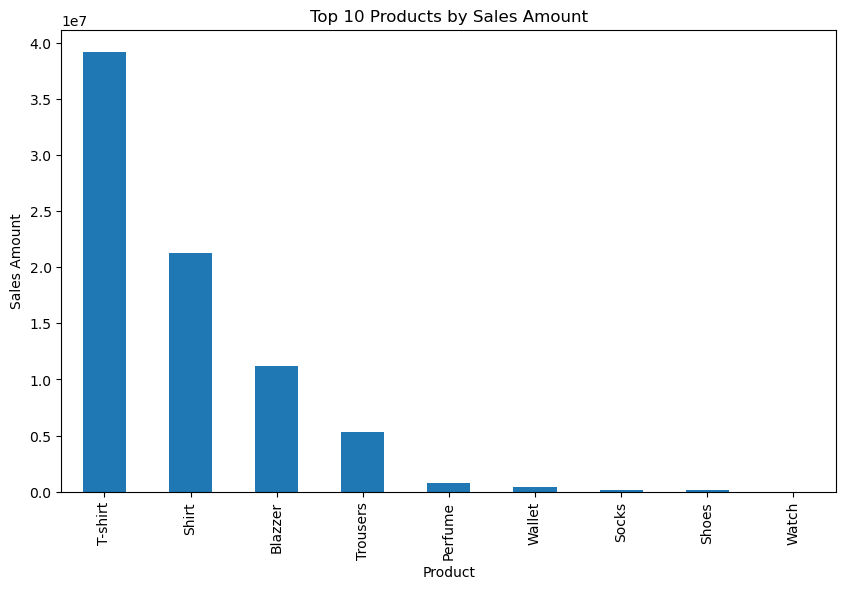

In [13]:
# Top products by quantity sold
plt.figure(figsize=(10, 6))
top_products_qty = data.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(10)
top_products_qty.plot(kind='bar', title='Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

# Top products by sales amount
plt.figure(figsize=(10, 6))
top_products_amount = data.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)
top_products_amount.plot(kind='bar', title='Top 10 Products by Sales Amount')
plt.xlabel('Product')
plt.ylabel('Sales Amount')
plt.show()


Analyzing Fulfillment Methods...


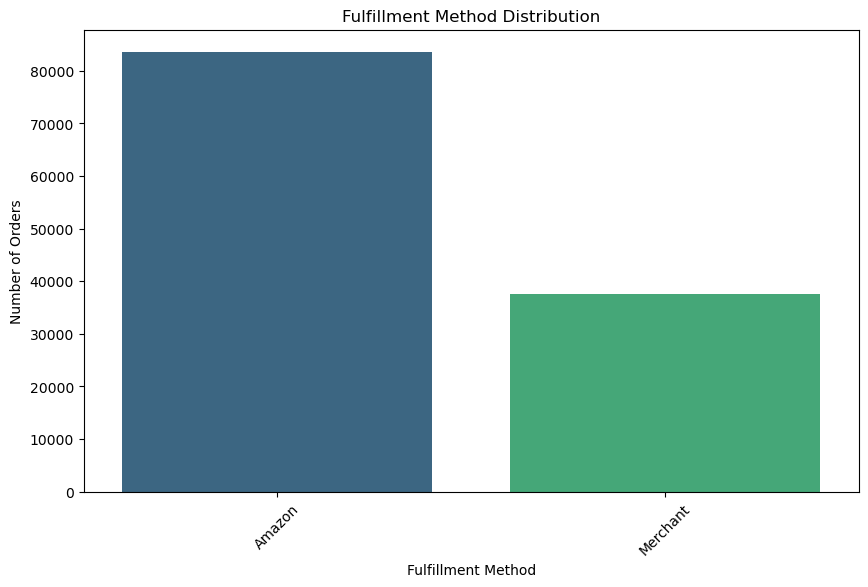

In [19]:
# # Fulfillment method distribution
# plt.figure(figsize=(10, 6))
# fulfillment_distribution = data['Fulfilment'].value_counts()
# fulfillment_distribution.plot(kind='bar', title='Fulfillment Method Distribution')
# plt.xlabel('Fulfillment Method')
# plt.ylabel('Number of Orders')
# plt.show()
# Fulfillment Analysis
import seaborn as sb
print("Analyzing Fulfillment Methods...")
fulfillment_distribution = data['Fulfilment'].value_counts()
plt.figure(figsize=(10, 6))
sb.barplot(x=fulfillment_distribution.index, y=fulfillment_distribution.values, palette='viridis')
plt.title('Fulfillment Method Distribution')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.savefig('fulfillment_method_distribution.png')
plt.show()

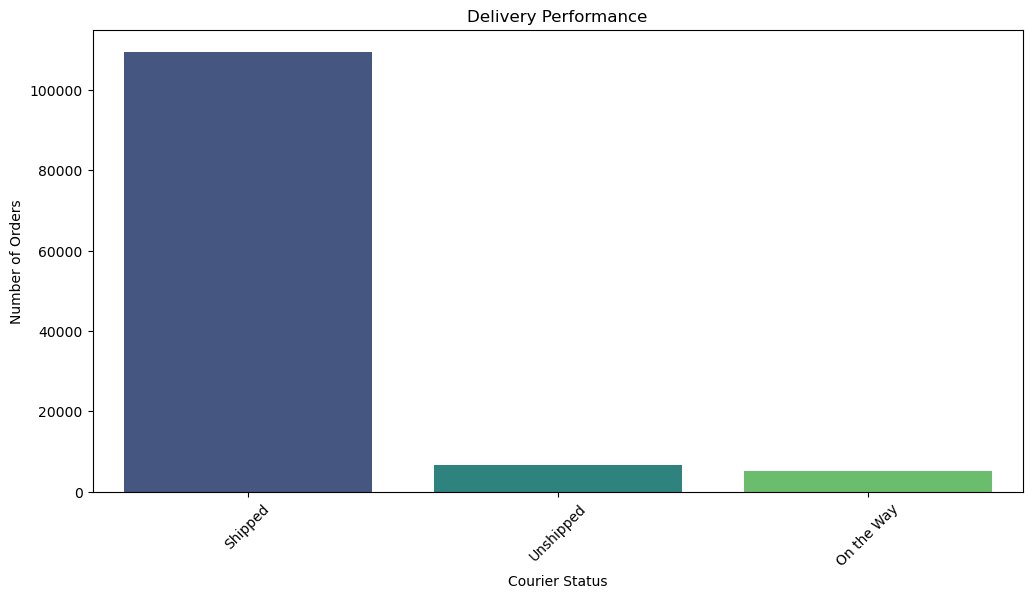

In [20]:
# # Assuming 'Courier Status' indicates delivery performance
# plt.figure(figsize=(10, 6))
# delivery_performance = data['Courier Status'].value_counts()
# delivery_performance.plot(kind='bar', title='Delivery Performance')
# plt.xlabel('Courier Status')
# plt.ylabel('Number of Orders')
# plt.show()

delivery_performance = data['Courier Status'].value_counts()
plt.figure(figsize=(12, 6))
sb.barplot(x=delivery_performance.index, y=delivery_performance.values, palette='viridis')
plt.title('Delivery Performance')
plt.xlabel('Courier Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.savefig('delivery_performance.png')
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


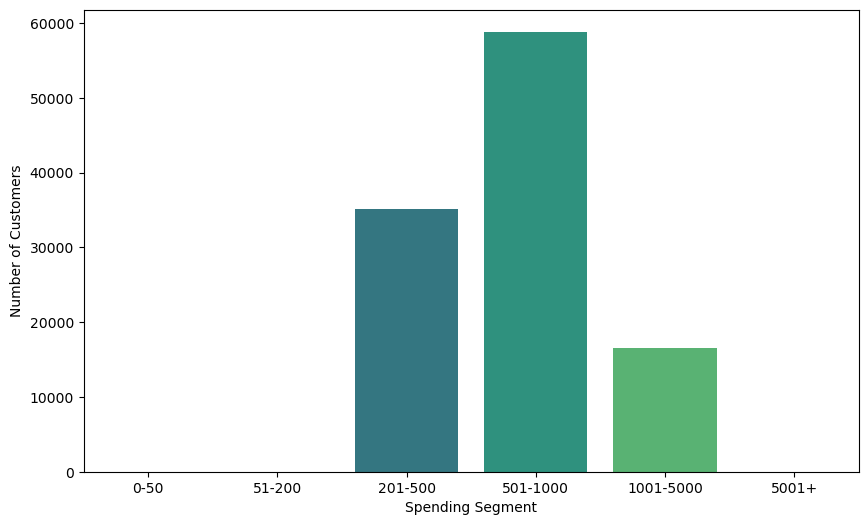

In [22]:
# Group by customer ID 
customer_data = data.groupby('Order ID').agg({
    'Amount': ['sum', 'count', 'mean'],
    'ship-city': 'first',
    'ship-state': 'first',
    'ship-country': 'first'
}).reset_index()

# Rename columns
customer_data.columns = ['Order ID', 'Total_Spent', 'Order_Count', 'Avg_Order_Value', 'City', 'State', 'Country']

# Segmentation based on spending
spending_bins = [0, 50, 200, 500, 1000, 5000, data['Amount'].max()]
spending_labels = ['0-50', '51-200', '201-500', '501-1000', '1001-5000', '5001+']
customer_data['Spending_Segment'] = pd.cut(customer_data['Total_Spent'], bins=spending_bins, labels=spending_labels)

# Visualize customer segments
plt.figure(figsize=(10, 6))
customer_segments = customer_data['Spending_Segment'].value_counts().sort_index()

# customer_segments.plot
sb.barplot(x=customer_segments.index, y=customer_segments.values, palette='viridis')

plt.xlabel('Spending Segment')
plt.ylabel('Number of Customers')
plt.show()


Analyzing Geographical Distribution...


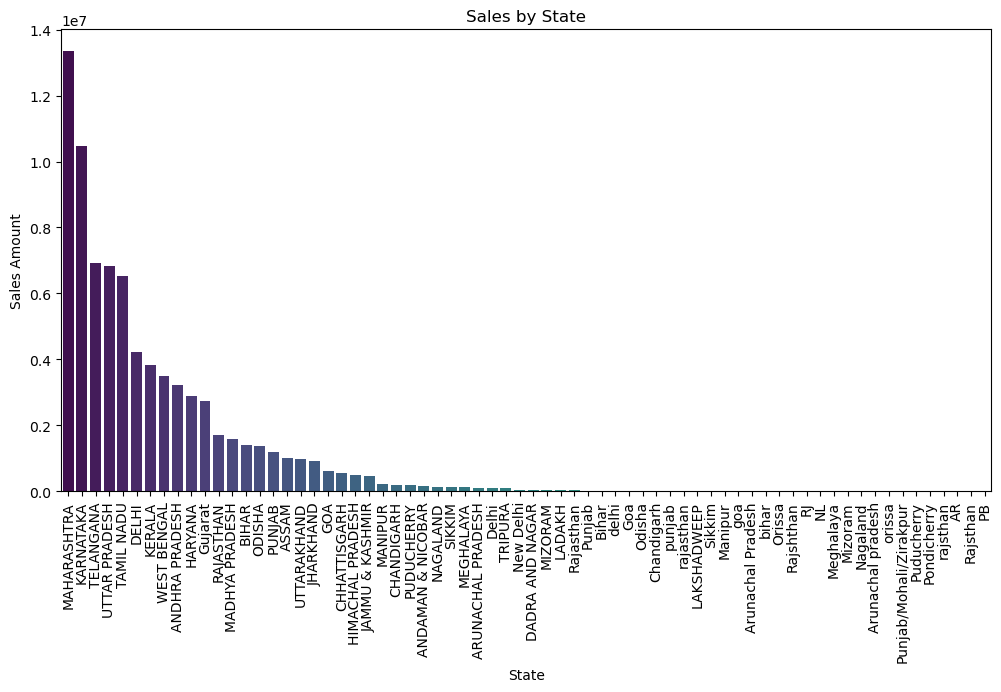

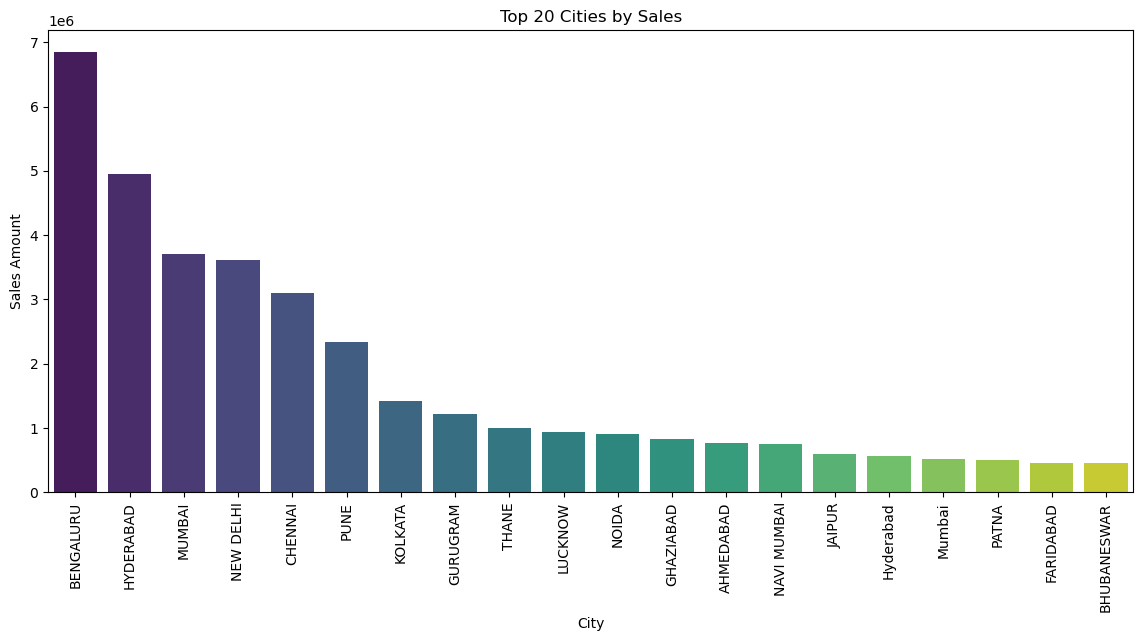

In [26]:
# Geographical Analysis
print("Analyzing Geographical Distribution...")
state_sales = data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sb.barplot(x=state_sales.index, y=state_sales.values, palette='viridis')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Sales Amount')
plt.xticks(rotation=90)
plt.savefig('sales_by_state.png')
plt.show()

city_sales = data.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(14, 6))
sb.barplot(x=city_sales.index, y=city_sales.values, palette='viridis')
plt.title('Top 20 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Sales Amount')
plt.xticks(rotation=90)
plt.savefig('top_cities_sales.png')
plt.show()


Generating Insights and Recommendations...
Summary of Findings:
Total Sales: 78590170.24999999
Average Order Value: 648.562176090975
Total Orders: 112887
Sales Growth Rate: 22937.88593763906
Top Product Categories: ['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume']
Top Fulfillment Method: Amazon
Top Customer Segment: 501-1000
Top Selling States: ['MAHARASHTRA', 'KARNATAKA', 'TELANGANA', 'UTTAR PRADESH', 'TAMIL NADU']
Top Selling Cities: ['BENGALURU', 'HYDERABAD', 'MUMBAI', 'NEW DELHI', 'CHENNAI']

Recommendations:
- Increase inventory for top-selling products and categories.
- Optimize fulfillment strategies based on performance analysis.
- Target high-value customer segments with personalized marketing.
- Focus marketing efforts on top-performing geographic regions.


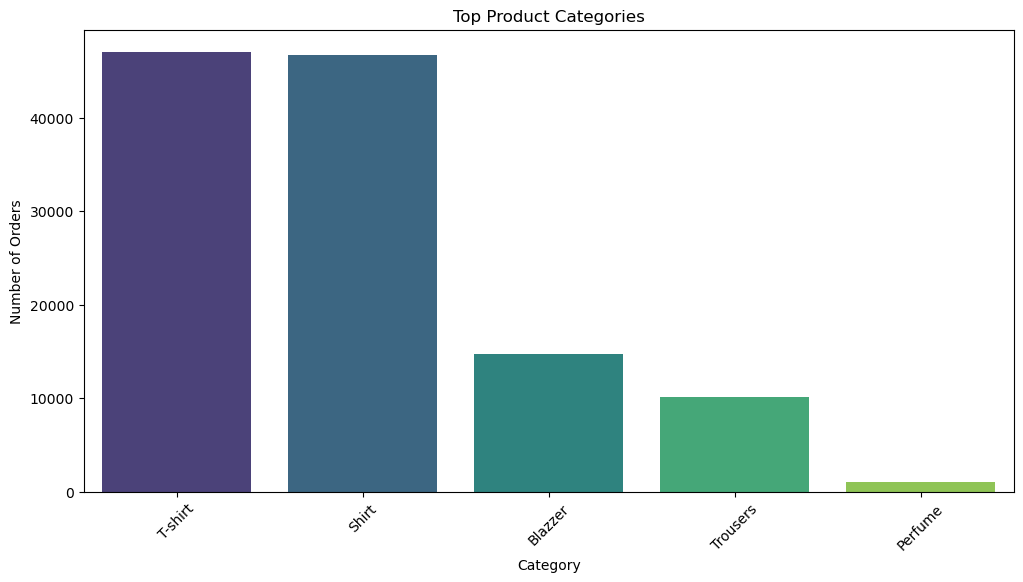

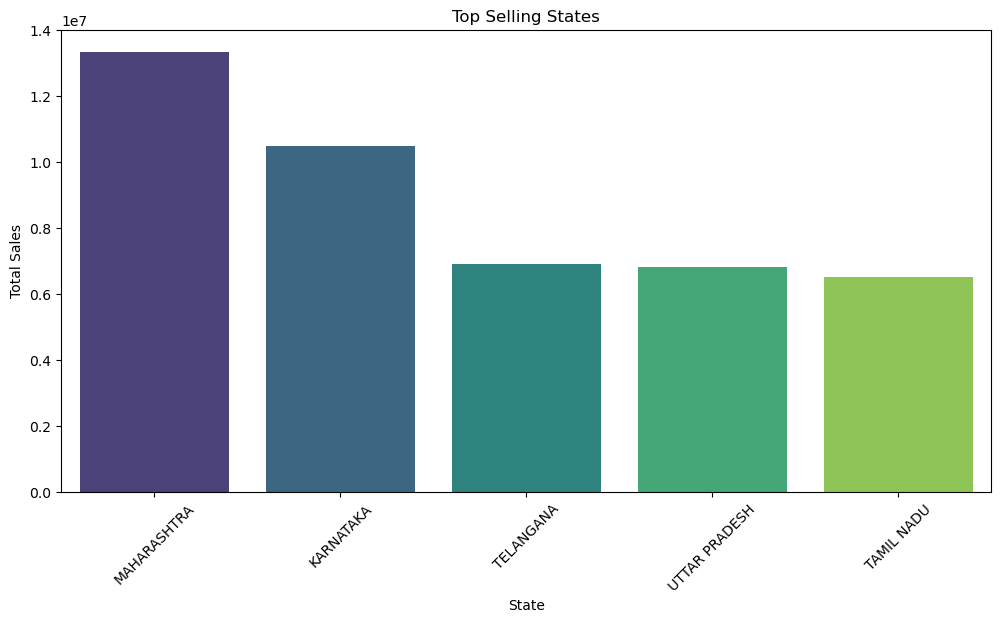

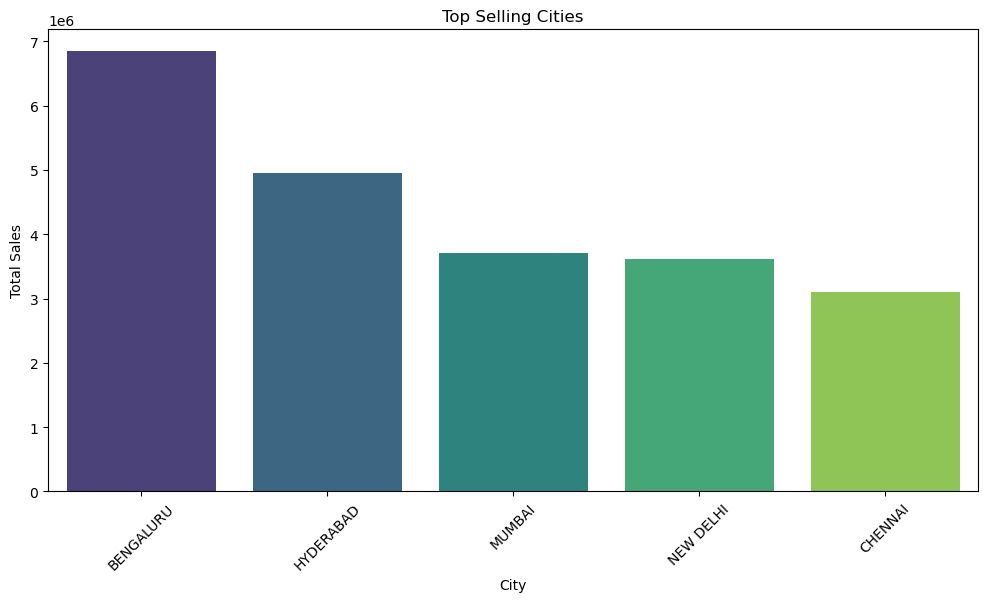

In [47]:

# Business Insights and Recommendations
category_distribution = data['Category'].value_counts()

print("Generating Insights and Recommendations...")

# Summary of findings
summary = {
    "Total Sales": total_sales,
    "Average Order Value": average_order_value,
    "Total Orders": total_orders,
    "Sales Growth Rate": sales_growth_rate,
    "Top Product Categories": category_distribution.index[:5].tolist(),
    "Top Fulfillment Method": fulfillment_distribution.idxmax(),
    "Top Customer Segment": customer_segments.idxmax(),
    "Top Selling States": state_sales.index[:5].tolist(),
    "Top Selling Cities": city_sales.index[:5].tolist()
}

# Recommendations
recommendations = [
    "Increase inventory for top-selling products and categories.",
    "Optimize fulfillment strategies based on performance analysis.",
    "Target high-value customer segments with personalized marketing.",
    "Focus marketing efforts on top-performing geographic regions."
]

# Print summary and recommendations
print("Summary of Findings:")
for key, value in summary.items():
    print(f"{key}: {value}")

print("\nRecommendations:")
for recommendation in recommendations:
    print(f"- {recommendation}")

# Distribution of top product categories
plt.figure(figsize=(12, 6))
sb.barplot(x=category_distribution.index[:5], y=category_distribution.values[:5], palette='viridis')
plt.title('Top Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Distribution of top selling states
plt.figure(figsize=(12, 6))
sb.barplot(x=state_sales.index[:5], y=state_sales.values[:5], palette='viridis')
plt.title('Top Selling States')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Distribution of top selling cities
plt.figure(figsize=(12, 6))
sb.barplot(x=city_sales.index[:5], y=city_sales.values[:5], palette='viridis')
plt.title('Top Selling Cities')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
